In [1]:
%pip install tqdm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [1]:
from processing_functions import create_df
start_date = "2023-03-24 12:00"
end_date = "2025-02-10 10:00"
df_main = create_df(timeFramesUsedInMinutes=["1","5", "15"], instrument="ES", 
                    start_date = start_date, end_date = end_date, putVolumeInData=False) 

In [2]:
df_main.columns

Index(['datetime', 'close', 'high', 'low', 'open', 'high_before_low', 'tenkan',
       'kijun', 'ssa', 'ssb', 'ssb_5', 'kijun_5', 'ssb_15', 'kijun_15', 'PP',
       'R1', 'R2', 'R3', 'S1', 'S2', 'S3'],
      dtype='object')

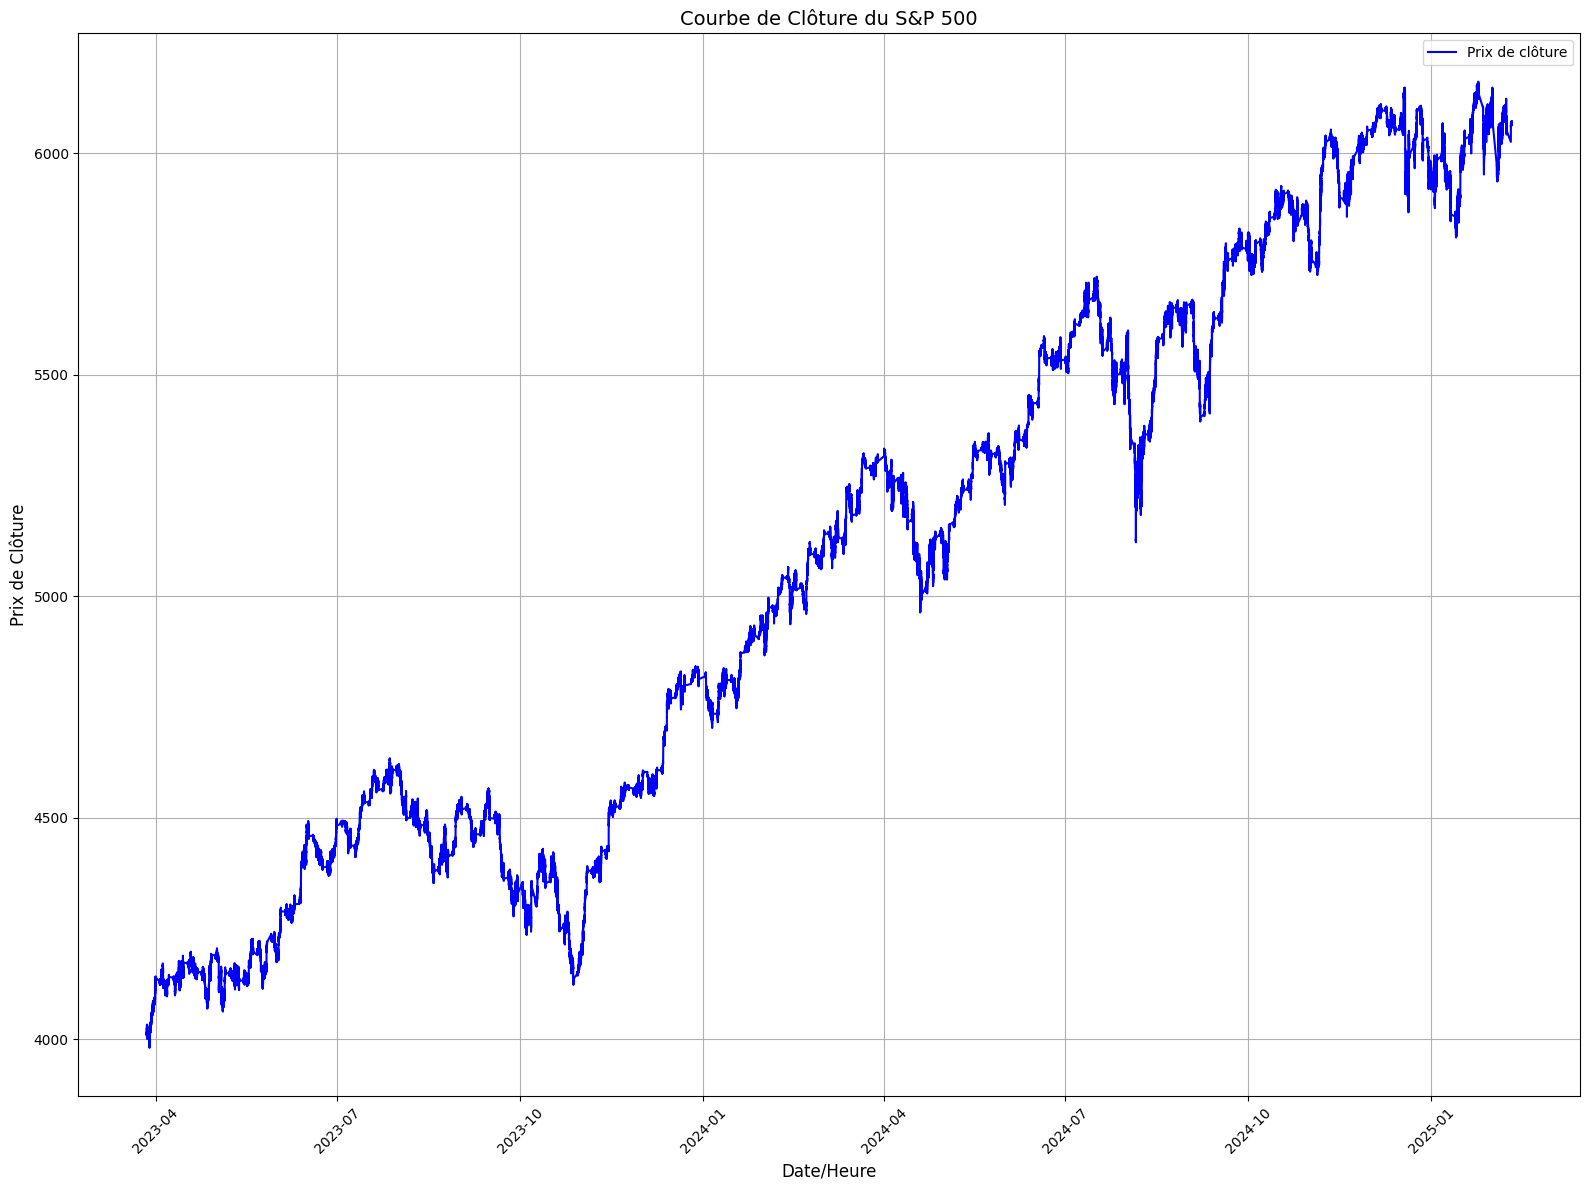

In [4]:

import matplotlib.pyplot as plt 
plt.figure(figsize=(16,12))
plt.plot(df_main['datetime'], df_main['close'], label='Prix de clôture', color='b')
plt.title('Courbe de Clôture du S&P 500', fontsize=14)
plt.xlabel('Date/Heure', fontsize=12)
plt.ylabel('Prix de Clôture', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

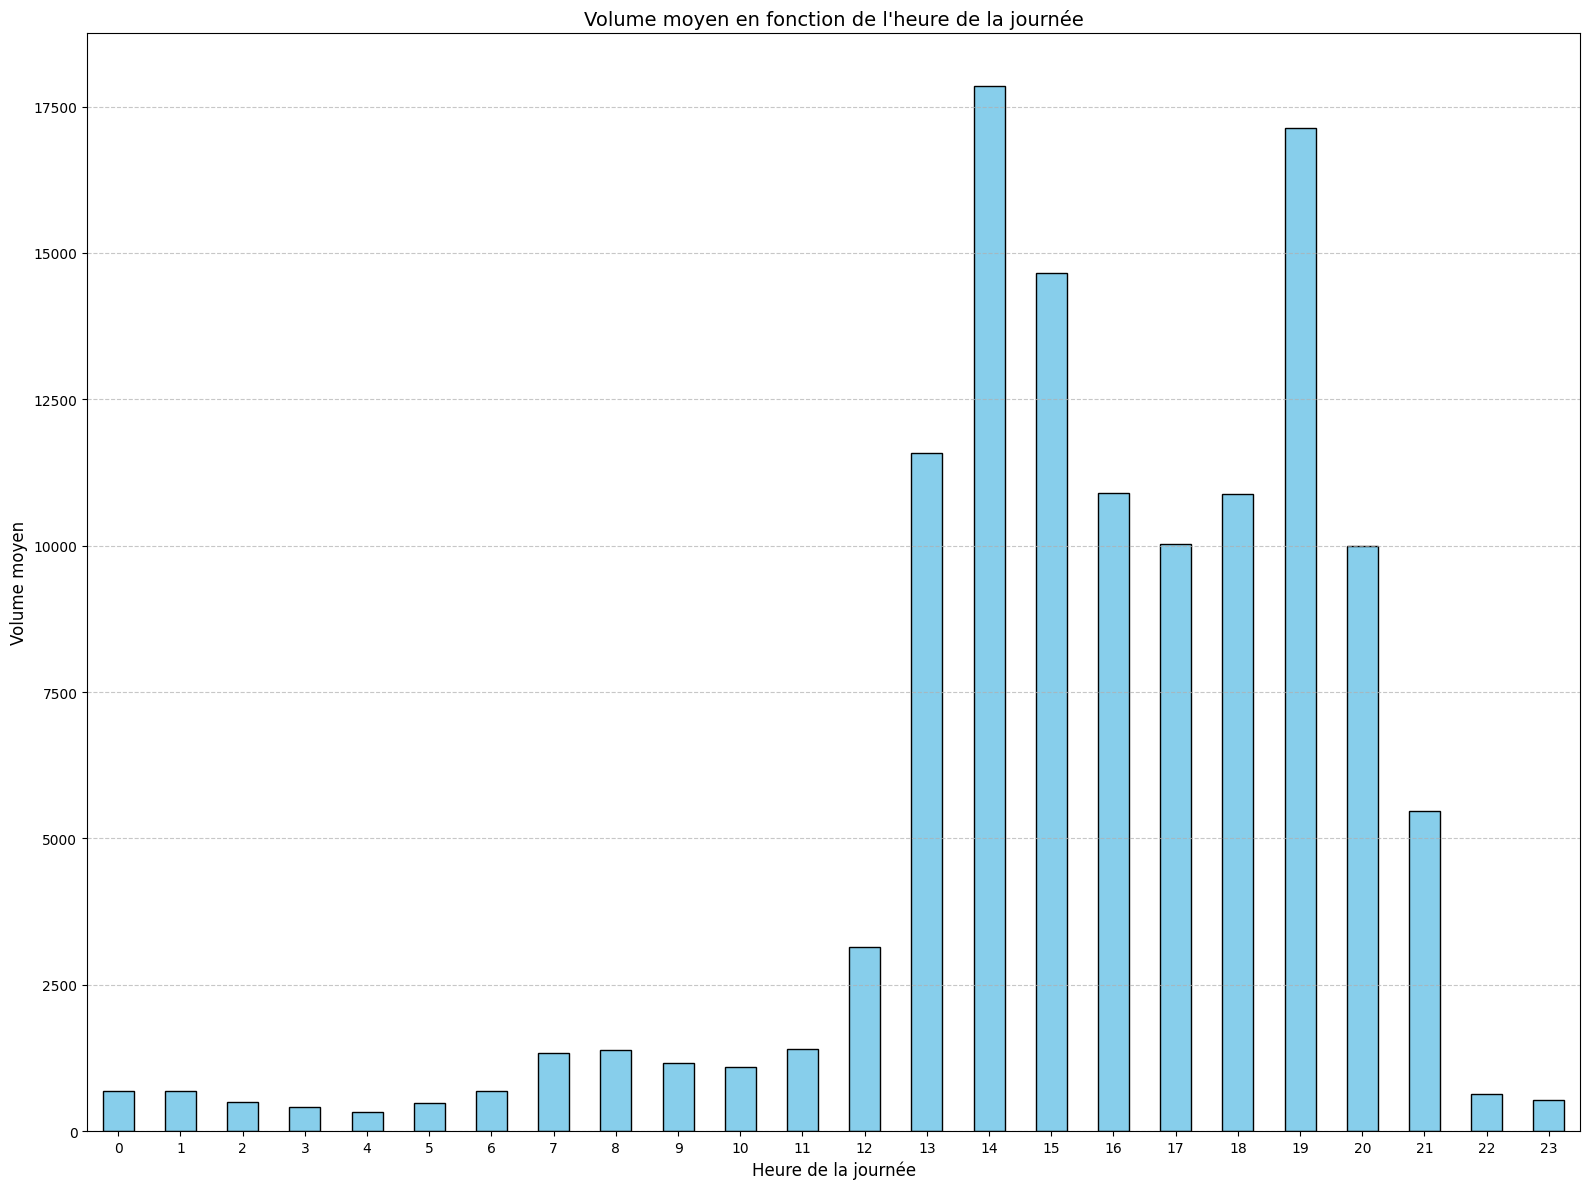

In [3]:
import matplotlib.pyplot as plt 

# Extraire l'heure de la journée à partir de 'timestamp'
df_main['hour'] = df_main['datetime'].dt.hour

# Calculer le volume moyen pour chaque heure
volume_moyen_par_heure = df_main.groupby('hour')['volume'].mean()

# Affichage des résultats sous forme d'histogramme
plt.figure(figsize=(16, 12))
volume_moyen_par_heure.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Volume moyen en fonction de l\'heure de la journée', fontsize=14)
plt.xlabel('Heure de la journée', fontsize=12)
plt.ylabel('Volume moyen', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.tight_layout()
plt.show()

### TRY WITH US CALENDAR EVENTS ###

In [12]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated.tail(5)

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethodsForKijunExitExit,"maxLossStreak, avgLossStreak"
155,76.244,68.92,66.64,0.510,-1.282,0.40,"(613, 191, 1)",20.5,51.4,"(55, 25, 55, 60)",0 days 00:40:00,0 days 02:10:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(11, 2.77)"
123,75.577,70.92,68.58,0.503,-1.211,0.42,"(622, 201, 1)",20.2,48.5,"(50, 25, 60, 55)",0 days 00:35:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(15, 2.72)"
125,75.589,71.32,69.03,0.506,-1.210,0.42,"(610, 197, 1)",20.4,48.5,"(50, 25, 60, 60)",0 days 00:35:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(14, 2.76)"
117,75.303,71.93,69.58,0.505,-1.191,0.42,"(622, 204, 1)",20.3,47.8,"(50, 25, 55, 55)",0 days 00:35:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(10, 2.67)"
119,75.309,72.50,70.20,0.508,-1.192,0.43,"(610, 200, 1)",20.4,47.8,"(50, 25, 55, 60)",0 days 00:35:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(10, 2.71)"


In [ ]:
from processing_functions import return_trade_datas_dataframe
filename = 'result_file51560'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"
tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated.tail(5) # only > or < SSB in high TF

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethodsForKijunExitExit,"maxLossStreak, avgLossStreak"
1,61.920,68.85,67.01,0.855,-1.113,0.77,"(400, 246, 1)",34.3,44.6,"(50, 25, 55, 60)",0 days 01:10:00,0 days 03:02:30,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,0,"(7, 1.91)"
28,76.429,69.68,67.68,0.518,-1.263,0.41,"(535, 165, 1)",20.9,50.7,"(55, 25, 55, 60)",0 days 00:40:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(19, 2.72)"
13,62.166,70.49,68.68,0.855,-1.115,0.77,"(396, 241, 1)",34.3,44.7,"(50, 25, 55, 65)",0 days 01:12:30,0 days 03:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,0,"(7, 1.92)"
16,75.793,72.42,70.45,0.515,-1.185,0.44,"(526, 168, 1)",20.7,47.6,"(50, 25, 55, 65)",0 days 00:35:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(13, 2.64)"
4,75.641,73.70,71.70,0.517,-1.178,0.44,"(531, 171, 1)",20.8,47.3,"(50, 25, 55, 60)",0 days 00:35:00,0 days 02:05:00,"[5, 15, 60]","[[0.6, -0.5]]",0.4,14,2,1,"(13, 2.66)"


In [1]:
from processing_functions import return_trade_datas_dataframe
filename = 'result_file_5m_2025-03-25_17-23-57.565385'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"
tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated # only SSB check in high TF + moveSL only when TP moved

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethod,"maxLossStreak, avgLossStreak",calendar_event
39,63.846,46.20,40.53,0.751,-1.148,0.66,"(415, 235, 1)",30.4,45.8,"(50, 25, 55, 65)",0 days 01:05:00,0 days 02:45:00,"[5, 15, 60]","[[0.6, -0.5], [0.9, 0.2]]",0.40,13,2,0,"(8, 1.9)",[]
40,63.441,46.88,41.19,0.746,-1.116,0.68,"(413, 238, 1)",30.2,44.5,"(50, 25, 55, 65)",0 days 01:02:30,0 days 02:41:15,"[5, 15, 60]","[[0.6, -0.4], [0.7, -0.2], [0.9, 0.25]]",0.40,13,2,0,"(8, 1.93)",[]
33,63.957,47.96,42.26,0.751,-1.148,0.66,"(417, 235, 1)",30.4,45.8,"(50, 25, 55, 65)",0 days 01:05:00,0 days 02:45:00,"[5, 15, 60]","[[0.6, -0.5], [0.9, 0.2]]",0.40,12,2,0,"(8, 1.91)",[]
42,63.692,48.07,42.40,0.752,-1.135,0.67,"(414, 236, 1)",30.4,45.3,"(50, 25, 55, 65)",0 days 01:00:00,0 days 02:42:30,"[5, 15, 60]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.40,13,2,0,"(8, 1.92)",[]
27,64.110,49.13,43.43,0.746,-1.142,0.66,"(418, 234, 1)",30.2,45.5,"(50, 25, 55, 65)",0 days 01:00:00,0 days 02:40:00,"[5, 15, 60]","[[0.6, -0.5], [0.9, 0.2]]",0.40,11,2,0,"(8, 1.89)",[]
46,63.538,49.69,44.02,0.750,-1.117,0.68,"(413, 237, 1)",30.4,44.5,"(50, 25, 55, 65)",0 days 01:05:00,0 days 02:45:00,"[5, 15, 60]","[[0.6, -0.4], [0.7, -0.2], [0.9, 0.25]]",0.40,14,2,0,"(7, 1.94)",[]
21,65.184,50.27,44.57,0.729,-1.164,0.64,"(425, 227, 1)",29.5,46.4,"(50, 25, 55, 65)",0 days 01:00:00,0 days 02:40:00,"[5, 15, 60]","[[0.6, -0.5], [0.9, 0.2]]",0.55,14,2,0,"(8, 1.91)",[]
34,63.706,50.33,44.63,0.747,-1.119,0.68,"(416, 237, 1)",30.2,44.6,"(50, 25, 55, 65)",0 days 01:02:30,0 days 02:40:00,"[5, 15, 60]","[[0.6, -0.4], [0.7, -0.2], [0.9, 0.25]]",0.40,12,2,0,"(8, 1.92)",[]
22,64.877,50.41,44.71,0.727,-1.143,0.65,"(423, 229, 1)",29.4,45.6,"(50, 25, 55, 65)",0 days 01:00:00,0 days 02:40:00,"[5, 15, 60]","[[0.6, -0.4], [0.7, -0.2], [0.9, 0.25]]",0.55,14,2,0,"(8, 1.95)",[]
35,63.190,50.45,44.76,0.756,-1.107,0.69,"(412, 240, 1)",30.6,44.1,"(50, 25, 55, 65)",0 days 01:00:00,0 days 02:40:00,"[5, 15, 60]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.40,12,2,0,"(6, 1.91)",[]


In [10]:
from processing_functions import describe_daily_and_weekly_trade_datas
describe_daily_and_weekly_trade_datas(filepath, selected_Id=780)


      profit_including_fees_from_start(%)
                                      sum
count                          681.000000
mean                             0.060308
std                              1.010307
min                             -4.814200
25%                              0.000000
50%                              0.000000
75%                              0.622160
max                              4.299440 
       profit_including_fees_from_start(%)
                                      sum
count                           98.000000
mean                             0.419077
std                              2.698706
min                             -7.509080
25%                             -1.072860
50%                              0.566200
75%                              2.527710
max                              6.896600


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-25_10-03-15.002078'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethod,"maxLossStreak, avgLossStreak",calendar_event
12,38.492,-100.66,-221.17,0.248,-0.171,1.48,"(5111, 8167, 542)",10.3,6.9,"(50, 25, 55, 65)",0 days 00:03:50,0 days 00:07:30,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,12,2,2,"(45, 3.58)",[]
16,38.468,-99.56,-220.10,0.248,-0.171,1.49,"(5109, 8172, 542)",10.3,6.9,"(50, 25, 55, 65)",0 days 00:03:50,0 days 00:07:30,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.60,12,2,2,"(45, 3.58)",[]
10,38.492,-97.64,-218.15,0.248,-0.171,1.49,"(5111, 8167, 542)",10.3,6.9,"(50, 25, 55, 65)",0 days 00:03:50,0 days 00:07:30,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,11,2,2,"(45, 3.58)",[]
11,38.564,-97.14,-217.62,0.248,-0.171,1.48,"(5119, 8155, 543)",10.3,6.9,"(50, 25, 55, 65)",0 days 00:03:50,0 days 00:07:30,"[1, 5, 15]","[[0.6, -0.5]]",0.55,12,2,2,"(45, 3.59)",[]
14,38.459,-97.03,-217.55,0.249,-0.171,1.49,"(5107, 8172, 542)",10.3,6.9,"(50, 25, 55, 65)",0 days 00:03:50,0 days 00:07:30,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.60,11,2,2,"(45, 3.58)",[]
15,38.555,-95.19,-215.70,0.248,-0.171,1.49,"(5119, 8158, 543)",10.3,6.9,"(50, 25, 55, 65)",0 days 00:03:50,0 days 00:07:30,"[1, 5, 15]","[[0.6, -0.5]]",0.60,12,2,2,"(45, 3.59)",[]
9,38.564,-94.24,-214.72,0.248,-0.171,1.49,"(5119, 8155, 543)",10.3,6.9,"(50, 25, 55, 65)",0 days 00:03:50,0 days 00:07:30,"[1, 5, 15]","[[0.6, -0.5]]",0.55,11,2,2,"(45, 3.59)",[]
13,38.546,-92.79,-213.28,0.249,-0.171,1.49,"(5117, 8158, 543)",10.3,6.9,"(50, 25, 55, 65)",0 days 00:03:50,0 days 00:07:30,"[1, 5, 15]","[[0.6, -0.5]]",0.60,11,2,2,"(45, 3.59)",[]
18,89.206,19.78,-58.75,0.143,-1.239,0.12,"(8033, 972, 1)",6.1,49.3,"(50, 25, 55, 65)",0 days 00:05:50,0 days 00:16:07.500000,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,11,2,4,"(42, 4.71)",[]
17,89.254,20.50,-57.98,0.143,-1.246,0.12,"(8032, 967, 1)",6.1,49.5,"(50, 25, 55, 65)",0 days 00:05:50,0 days 00:16:10,"[1, 5, 15]","[[0.6, -0.5]]",0.55,11,2,4,"(42, 4.73)",[]


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-25_11-23-03.360828'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated #with only SSB on higher tf

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethod,"maxLossStreak, avgLossStreak",calendar_event
7,54.142,41.91,12.61,0.891,-1.041,0.87,"(1817, 1539, 4)",36.0,41.4,"(50, 25, 55, 65)",0 days 00:55:45,0 days 02:11:42.500000,"[1, 15]","[[0.6, -0.5]]",0.55,12,2,0,"(14, 1.96)",[]
1,54.219,48.14,18.75,0.891,-1.040,0.87,"(1825, 1541, 4)",36.0,41.4,"(50, 25, 55, 65)",0 days 00:55:00,0 days 02:11:40,"[1, 15]","[[0.6, -0.5]]",0.55,11,2,0,"(14, 1.96)",[]
9,57.014,51.83,21.84,0.818,-1.067,0.78,"(1959, 1477, 4)",33.1,42.5,"(50, 25, 55, 65)",0 days 00:53:20,0 days 02:07:12.500000,"[1, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,12,2,0,"(14, 2.01)",[]
11,53.685,53.35,22.45,0.826,-0.942,0.89,"(1901, 1640, 3)",33.4,37.4,"(50, 25, 55, 65)",0 days 00:51:30,0 days 02:02:30,"[1, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,12,2,0,"(11, 1.93)",[]
3,56.944,54.83,24.71,0.818,-1.062,0.78,"(1964, 1485, 4)",33.1,42.3,"(50, 25, 55, 65)",0 days 00:53:10,0 days 02:06:50,"[1, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,11,2,0,"(14, 2.01)",[]
5,53.755,59.76,28.85,0.828,-0.943,0.89,"(1904, 1638, 3)",33.5,37.4,"(50, 25, 55, 65)",0 days 00:51:30,0 days 02:02:40,"[1, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,11,2,0,"(11, 1.93)",[]
6,54.035,111.34,83.97,0.840,-0.928,0.92,"(1694, 1441, 3)",34.0,36.8,"(50, 25, 55, 65)",0 days 00:52:15,0 days 02:02:47.500000,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,11,2,0,"(10, 1.92)",[]
4,57.388,111.97,85.50,0.833,-1.052,0.80,"(1740, 1292, 4)",33.7,41.9,"(50, 25, 55, 65)",0 days 00:54:20,0 days 02:09:12.500000,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,11,2,0,"(14, 2.02)",[]
2,54.831,115.69,89.84,0.906,-1.029,0.89,"(1623, 1337, 4)",36.6,40.9,"(50, 25, 55, 65)",0 days 00:56:40,0 days 02:15:00,"[1, 5, 15]","[[0.6, -0.5]]",0.55,11,2,0,"(14, 1.96)",[]
12,54.220,120.34,93.04,0.840,-0.928,0.92,"(1696, 1432, 3)",34.0,36.9,"(50, 25, 55, 65)",0 days 00:52:30,0 days 02:02:50,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,12,2,0,"(10, 1.92)",[]


In [2]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-25_13-58-16.276497'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated.tail(5) #with only SSB on higher tf

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethod,"maxLossStreak, avgLossStreak",calendar_event
22,51.791,117.56,89.54,0.836,-0.839,1.02,"(1663, 1548, 3)",33.8,33.3,"(50, 25, 50, 65)",0 days 00:50:15,0 days 01:58:25,"[1, 5, 15]","[[0.6, -0.4], [0.7, -0.2], [0.9, 0.25]]",0.55,12,2,0,"(10, 1.89)",[]
5,50.361,117.71,89.91,0.869,-0.823,1.08,"(1604, 1581, 3)",35.1,32.6,"(50, 25, 55, 65)",0 days 00:50:50,0 days 02:01:42.500000,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,11,2,0,"(10, 1.87)",[]
18,54.220,120.34,93.04,0.840,-0.928,0.92,"(1696, 1432, 3)",34.0,36.9,"(50, 25, 55, 65)",0 days 00:52:30,0 days 02:02:50,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,12,2,0,"(10, 1.92)",[]
24,53.729,120.78,93.27,0.842,-0.912,0.94,"(1693, 1458, 4)",34.0,36.2,"(50, 25, 50, 65)",0 days 00:52:00,0 days 02:00:50,"[1, 5, 15]","[[0.6, -0.5], [0.75, -0.2], [0.9, 0.3]]",0.55,12,2,0,"(10, 1.92)",[]
11,50.031,121.90,93.90,0.870,-0.811,1.09,"(1605, 1603, 3)",35.1,32.1,"(50, 25, 50, 65)",0 days 00:50:20,0 days 02:00:15,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,11,2,0,"(10, 1.86)",[]


In [ ]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-25_18-07-44.793163'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated.tail(5) # with SSB only on higher timeframe + moveSL after tp moved and tenkan count in tp move func

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethod,"maxLossStreak, avgLossStreak",calendar_event
13,59.019,146.94,121.67,0.859,-1.131,0.77,"(1708, 1186, 4)",34.7,45.0,"(50, 25, 55, 65)",0 days 00:52:40,0 days 02:32:40,"[1, 5, 15]","[[0.6, -0.5]]",0.55,11,2,0,"(17, 2.37)",[]
15,57.517,148.15,122.12,0.845,-1.043,0.82,"(1714, 1266, 5)",34.1,41.6,"(50, 25, 55, 65)",0 days 00:51:00,0 days 02:26:50,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,11,2,0,"(17, 2.38)",[]
5,59.415,147.45,122.70,0.862,-1.153,0.76,"(1685, 1151, 3)",34.8,45.9,"(50, 25, 55, 65)",0 days 00:55:00,0 days 02:36:50,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.35,11,2,0,"(17, 2.38)",[]
14,59.835,148.91,123.48,0.839,-1.141,0.75,"(1743, 1170, 4)",33.9,45.4,"(50, 25, 55, 65)",0 days 00:52:10,0 days 02:30:30,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,11,2,0,"(17, 2.36)",[]
8,59.437,148.64,124.12,0.865,-1.154,0.76,"(1669, 1139, 4)",34.9,46.0,"(50, 25, 55, 65)",0 days 00:55:30,0 days 02:39:55,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.35,12,2,0,"(17, 2.38)",[]


In [5]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-25_20-18-11.680621'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated.tail(5) # with SSB only on higher timeframe + moveSL after tp moved and tenkan count in strategy runner

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethod,"maxLossStreak, avgLossStreak",calendar_event
8,62.415,156.31,129.41,0.779,-1.179,0.67,"(1923, 1158, 4)",31.5,47.0,"(50, 25, 55, 65)",0 days 00:50:40,0 days 02:14:00,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,11,2,0,"(16, 2.31)",[]
9,61.712,156.58,129.55,0.780,-1.144,0.69,"(1910, 1185, 4)",31.5,45.6,"(50, 25, 55, 65)",0 days 00:50:00,0 days 02:14:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,11,2,0,"(16, 2.32)",[]
10,62.222,158.28,131.56,0.785,-1.175,0.68,"(1904, 1156, 4)",31.7,46.8,"(50, 25, 55, 65)",0 days 00:51:00,0 days 02:15:17.500000,"[1, 5, 15]","[[0.6, -0.5]]",0.55,12,2,0,"(16, 2.31)",[]
11,62.638,161.87,135.07,0.778,-1.182,0.67,"(1923, 1147, 4)",31.5,47.1,"(50, 25, 55, 65)",0 days 00:50:50,0 days 02:14:57.500000,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,12,2,0,"(16, 2.31)",[]
12,61.820,162.17,135.20,0.779,-1.142,0.69,"(1909, 1179, 4)",31.5,45.5,"(50, 25, 55, 65)",0 days 00:50:20,0 days 02:15:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,12,2,0,"(16, 2.34)",[]


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-26_08-04-29.496581'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated.tail(5) # with SSB only on higher timeframe + moveSL after tp moved and tenkan count in strategy runner

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,tpToMoveInTicks,nbrTimeMaxMoveTP,stopMethod,"maxLossStreak, avgLossStreak",calendar_event
2,62.801,162.94,135.76,0.772,-1.183,0.66,"(1955, 1158, 4)",31.2,47.1,"(50, 25, 55, 65)",0 days 00:49:00,0 days 02:14:00,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,11,2,0,"(16, 2.29)",[]
3,62.148,164.44,137.13,0.773,-1.149,0.68,"(1944, 1184, 4)",31.3,45.8,"(50, 25, 55, 65)",0 days 00:48:35,0 days 02:13:05,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,11,2,0,"(16, 2.29)",[]
4,62.593,167.88,140.87,0.780,-1.180,0.67,"(1936, 1157, 4)",31.6,47.0,"(50, 25, 55, 65)",0 days 00:49:30,0 days 02:14:30,"[1, 5, 15]","[[0.6, -0.5]]",0.55,12,2,0,"(16, 2.3)",[]
5,63.044,171.72,144.64,0.772,-1.187,0.66,"(1955, 1146, 4)",31.2,47.3,"(50, 25, 55, 65)",0 days 00:49:20,0 days 02:14:20,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,12,2,0,"(16, 2.29)",[]
6,62.291,174.75,147.54,0.774,-1.150,0.68,"(1941, 1175, 4)",31.3,45.8,"(50, 25, 55, 65)",0 days 00:49:00,0 days 02:14:00,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,12,2,0,"(16, 2.31)",[]


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-27_13-45-15.782631'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,slModifierAfterAlmostHit,percentSlAlmostHit,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
9,62.790,158.28,130.10,0.776,-1.002,0.66,"(1895, 1123, 214)",31.4,47.3,"(50, 25, 55, 65)",0 days 00:47:40,0 days 02:03:40,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,0.0,0.8,2,"(16, 2.09)"
15,59.274,159.37,131.22,0.775,-1.024,0.77,"(1911, 1313, 4)",31.3,40.8,"(50, 25, 55, 65)",0 days 00:47:30,0 days 02:03:52.500000,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,-0.1,0.8,2,"(16, 2.18)"
13,56.923,161.24,132.36,0.774,-0.928,0.85,"(1883, 1425, 3)",31.3,36.9,"(50, 25, 55, 65)",0 days 00:46:10,0 days 02:00:25,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,-0.1,0.7,2,"(15, 2.14)"
10,62.022,162.32,134.00,0.778,-0.976,0.69,"(1883, 1153, 212)",31.5,45.8,"(50, 25, 55, 65)",0 days 00:47:15,0 days 02:03:10,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,0.0,0.8,2,"(16, 2.11)"
14,56.173,165.07,136.02,0.777,-0.901,0.88,"(1870, 1459, 3)",31.4,35.8,"(50, 25, 55, 65)",0 days 00:46:00,0 days 01:59:42.500000,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,-0.1,0.7,2,"(15, 2.17)"
7,63.010,166.71,137.72,0.776,-0.900,0.66,"(1867, 1096, 362)",31.4,47.4,"(50, 25, 55, 65)",0 days 00:45:50,0 days 01:59:20,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,0.0,0.7,2,"(14, 1.98)"
16,58.593,166.44,138.14,0.778,-0.995,0.80,"(1899, 1342, 4)",31.5,39.6,"(50, 25, 55, 65)",0 days 00:47:10,0 days 02:03:40,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,-0.1,0.8,2,"(16, 2.2)"
8,62.152,167.64,138.48,0.779,-0.876,0.69,"(1854, 1129, 362)",31.5,45.8,"(50, 25, 55, 65)",0 days 00:45:30,0 days 01:58:20,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,0.0,0.7,2,"(14, 2.0)"
11,62.945,168.25,140.79,0.775,-1.108,0.66,"(1928, 1135, 86)",31.3,47.3,"(50, 25, 55, 65)",0 days 00:48:40,0 days 02:11:00,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,0.0,0.9,2,"(16, 2.19)"
17,61.548,171.02,143.62,0.775,-1.119,0.70,"(1932, 1207, 3)",31.4,44.5,"(50, 25, 55, 65)",0 days 00:48:35,0 days 02:11:40,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,-0.1,0.9,2,"(16, 2.23)"


In [5]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-28_10-28-50.346875'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",Q2 duration (médiane),Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,slModifierAfterAlmostHit,percentSlAlmostHit,PassThrTenkan,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
6,66.147,165.11,136.00,0.657,-1.160,0.58,"(2206, 1129, 3)",26.6,46.2,"(50, 25, 55, 65)",0 days 00:44:30,0 days 01:59:12.500000,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.9, 0.35]]",0.60,0.1,0.7,2,2,"(17, 2.37)"
5,65.807,168.32,139.22,0.662,-1.148,0.59,"(2194, 1140, 3)",26.8,45.7,"(50, 25, 55, 65)",0 days 00:44:30,0 days 01:58:50,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.60,0.1,0.7,2,2,"(17, 2.37)"
4,66.727,175.40,146.52,0.661,-1.189,0.57,"(2208, 1101, 3)",26.8,47.3,"(50, 25, 55, 65)",0 days 00:45:20,0 days 01:59:55,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.60,0.1,0.7,2,2,"(17, 2.36)"
3,66.345,183.68,154.71,0.663,-1.166,0.58,"(2202, 1117, 3)",26.9,46.4,"(50, 25, 55, 65)",0 days 00:45:35,0 days 01:59:47.500000,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.2], [0.9, 0.35]]",0.55,0.1,0.7,2,2,"(17, 2.37)"
2,65.953,184.84,155.90,0.668,-1.152,0.59,"(2187, 1129, 3)",27.1,45.9,"(50, 25, 55, 65)",0 days 00:45:50,0 days 01:59:45,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,0.1,0.7,2,2,"(17, 2.39)"
1,66.778,186.08,157.32,0.666,-1.192,0.57,"(2201, 1095, 3)",27.0,47.5,"(50, 25, 55, 65)",0 days 00:46:10,0 days 02:00:20,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,0.1,0.7,2,2,"(17, 2.38)"


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-28_15-15-35.990925'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,Q3 duration (75%),timeframes,bracketsModifier,percentHitToMoveTP,slModifierAfterAlmostHit,percentSlAlmostHit,PassThrTenkan,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
18,62.857,150.33,120.92,0.759,-0.888,0.66,"(1892, 1118, 363)",30.7,46.6,"(50, 25, 55, 65)",...,0 days 01:56:20,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.8, 0.2], [0.92, ...",0.60,0.0,0.7,2,12,2,"(14, 1.97)"
12,65.610,150.48,121.58,0.674,-1.175,0.58,"(2173, 1139, 3)",27.3,46.8,"(50, 25, 55, 65)",...,0 days 02:00:20,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.8, 0.2], [0.92, ...",0.60,0.2,0.7,2,12,2,"(16, 2.33)"
17,62.041,151.99,122.67,0.772,-0.874,0.68,"(1860, 1138, 364)",31.2,45.7,"(50, 25, 55, 65)",...,0 days 01:56:57.500000,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.60,0.0,0.7,2,12,2,"(14, 1.99)"
11,64.930,155.49,126.67,0.684,-1.153,0.60,"(2144, 1158, 3)",27.7,45.9,"(50, 25, 55, 65)",...,0 days 02:00:30,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.60,0.2,0.7,2,12,2,"(16, 2.34)"
16,63.034,159.09,129.99,0.770,-0.898,0.66,"(1874, 1099, 364)",31.2,47.3,"(50, 25, 55, 65)",...,0 days 01:58:40,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.60,0.0,0.7,2,12,2,"(14, 1.98)"
10,65.822,161.56,132.96,0.683,-1.194,0.58,"(2157, 1120, 3)",27.7,47.5,"(50, 25, 55, 65)",...,0 days 02:00:52.500000,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.60,0.2,0.7,2,12,2,"(16, 2.33)"
6,66.487,163.60,134.41,0.652,-1.170,0.57,"(2224, 1121, 3)",26.4,46.6,"(50, 25, 55, 65)",...,0 days 01:58:42.500000,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.8, 0.2], [0.92, ...",0.60,0.1,0.7,2,12,2,"(17, 2.35)"
15,63.084,166.66,137.39,0.765,-0.892,0.66,"(1890, 1106, 361)",31.0,46.9,"(50, 25, 55, 65)",...,0 days 01:57:30,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.8, 0.2], [0.92, ...",0.55,0.0,0.7,2,12,2,"(14, 1.97)"
13,63.010,166.71,137.72,0.776,-0.900,0.66,"(1867, 1096, 362)",31.4,47.4,"(50, 25, 55, 65)",...,0 days 01:59:20,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,0.0,0.7,2,12,2,"(14, 1.98)"
14,62.152,167.64,138.48,0.779,-0.876,0.69,"(1854, 1129, 362)",31.5,45.8,"(50, 25, 55, 65)",...,0 days 01:58:20,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,0.0,0.7,2,12,2,"(14, 2.0)"


In [1]:
from processing_functions import return_trade_datas_dataframe

filename = 'result_file_1m_2025-03-29_11-38-45.340806'
filepath = f"ES/2023-03-24_12-00_2025-02-10_10-00/{filename}.pkl"

tradeDatasFormated = return_trade_datas_dataframe(filepath, sort_option=2) #start_date="2025-01-01 00:00:00", end_date="2025-02-14 12:00:00")
tradeDatasFormated 

,Winrate [%],Total return brut [%],Total return net [%],Avg. gain net [%],Avg. loss net [%],Risk ratio,Nbr Wins/Loss/Breakeven,Avg. executed TP [Ticks],Avg. executed SL [Ticks],"[SL1, TP1] / [SL2, TP2] [Ticks]",...,timeframes,bracketsModifier,percentHitToMoveTP,slModifierAfterAlmostHit,percentSlAlmostHit,PassThrTenkan,ratioDistanceKijun,tpToMoveInTicks,nbrTimeMaxMoveTP,"maxLossStreak, avgLossStreak"
5,66.549,54.58,42.19,0.629,-1.160,0.55,"(945, 475, 1)",25.5,46.1,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,0.1,0.7,2,0.2,12,2,"(16, 2.32)"
4,67.374,54.72,42.39,0.627,-1.201,0.53,"(952, 461, 1)",25.4,47.8,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,0.1,0.7,2,0.2,12,2,"(16, 2.34)"
6,67.229,55.14,42.73,0.624,-1.186,0.54,"(956, 466, 1)",25.3,47.2,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.8, 0.2], [0.92, ...",0.55,0.1,0.7,2,0.2,12,2,"(16, 2.32)"
15,66.958,197.01,168.06,0.658,-1.178,0.57,"(2221, 1096, 3)",26.7,46.9,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.8, 0.2], [0.92, ...",0.55,0.1,0.7,2,0.8,12,2,"(17, 2.35)"
14,66.142,198.16,169.31,0.668,-1.150,0.59,"(2186, 1119, 3)",27.1,45.8,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,0.1,0.7,2,0.8,12,2,"(17, 2.38)"
13,66.971,199.40,170.73,0.666,-1.190,0.57,"(2200, 1085, 3)",27.0,47.4,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,0.1,0.7,2,0.8,12,2,"(17, 2.37)"
7,68.835,227.70,206.49,0.666,-1.193,0.57,"(1672, 757, 3)",27.0,47.6,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.9, 0.2]]",0.55,0.1,0.7,2,0.4,12,2,"(16, 2.49)"
8,68.044,234.56,213.22,0.668,-1.145,0.59,"(1663, 781, 3)",27.1,45.6,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.95, 0.45]]",0.55,0.1,0.7,2,0.4,12,2,"(16, 2.47)"
9,68.980,235.29,213.90,0.658,-1.177,0.57,"(1690, 760, 3)",26.7,46.9,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.8, 0.2], [0.92, ...",0.55,0.1,0.7,2,0.4,12,2,"(16, 2.46)"
12,68.398,281.40,253.84,0.661,-1.172,0.57,"(2160, 998, 3)",26.8,46.7,"(50, 25, 55, 65)",...,"[1, 5, 15]","[[0.6, -0.5], [0.7, -0.1], [0.8, 0.2], [0.92, ...",0.55,0.1,0.7,2,0.6,12,2,"(17, 2.46)"


In [3]:
from processing_functions import describe_daily_and_weekly_trade_datas
describe_daily_and_weekly_trade_datas(filepath, selected_Id=1)

      profit_including_fees_from_start(%)
                                      sum
count                          684.000000
mean                             0.253558
std                              1.995217
min                             -7.019760
25%                             -0.465110
50%                              0.000000
75%                              1.286340
max                              9.371820 
       profit_including_fees_from_start(%)
                                      sum
count                           98.000000
mean                             1.769732
std                              4.833247
min                            -12.001480
25%                             -1.074175
50%                              2.164260
75%                              4.391250
max                             11.230160


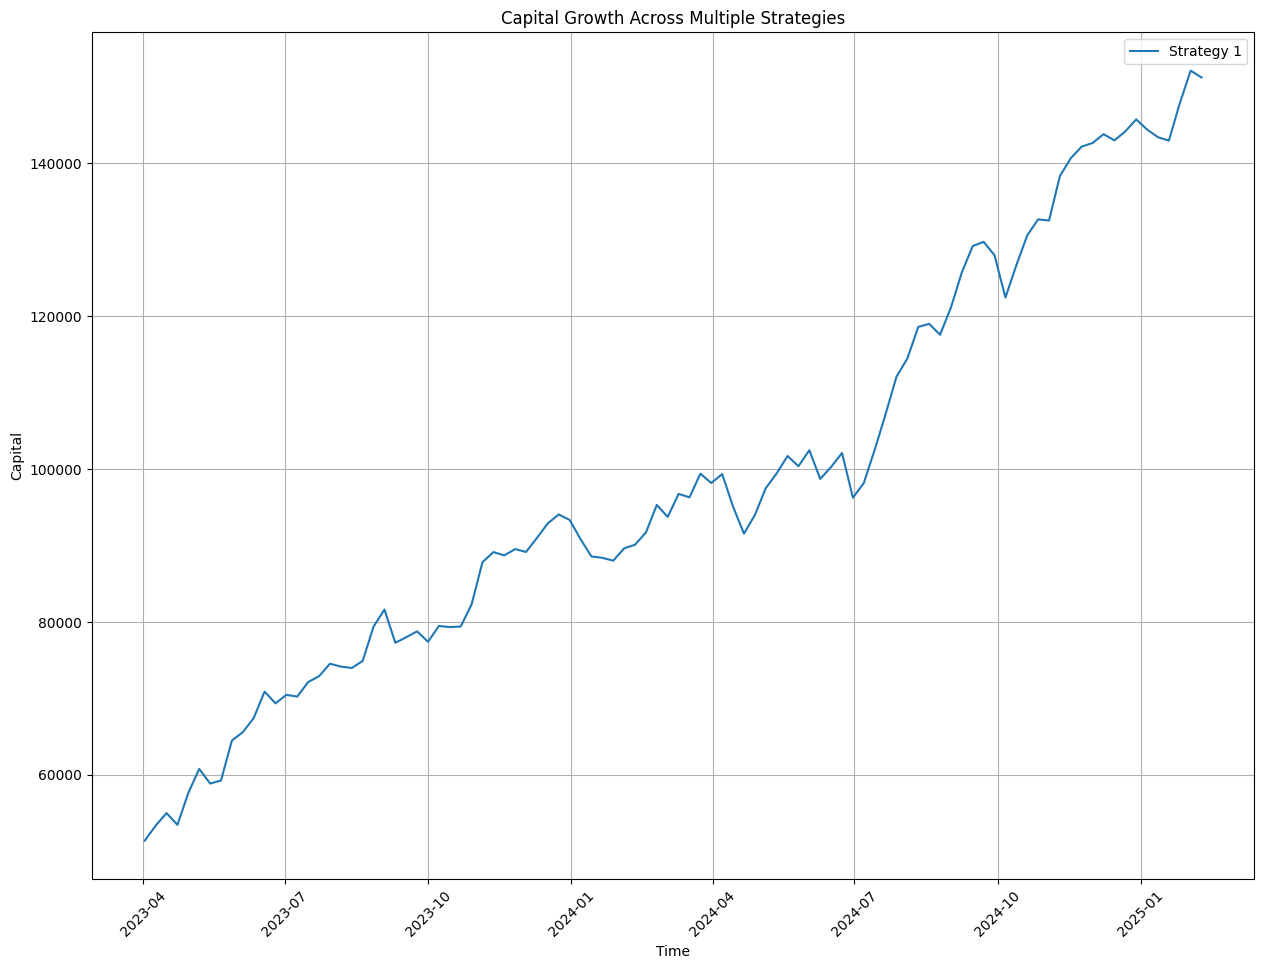

In [2]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[1],
                             plotSize=(15,11))

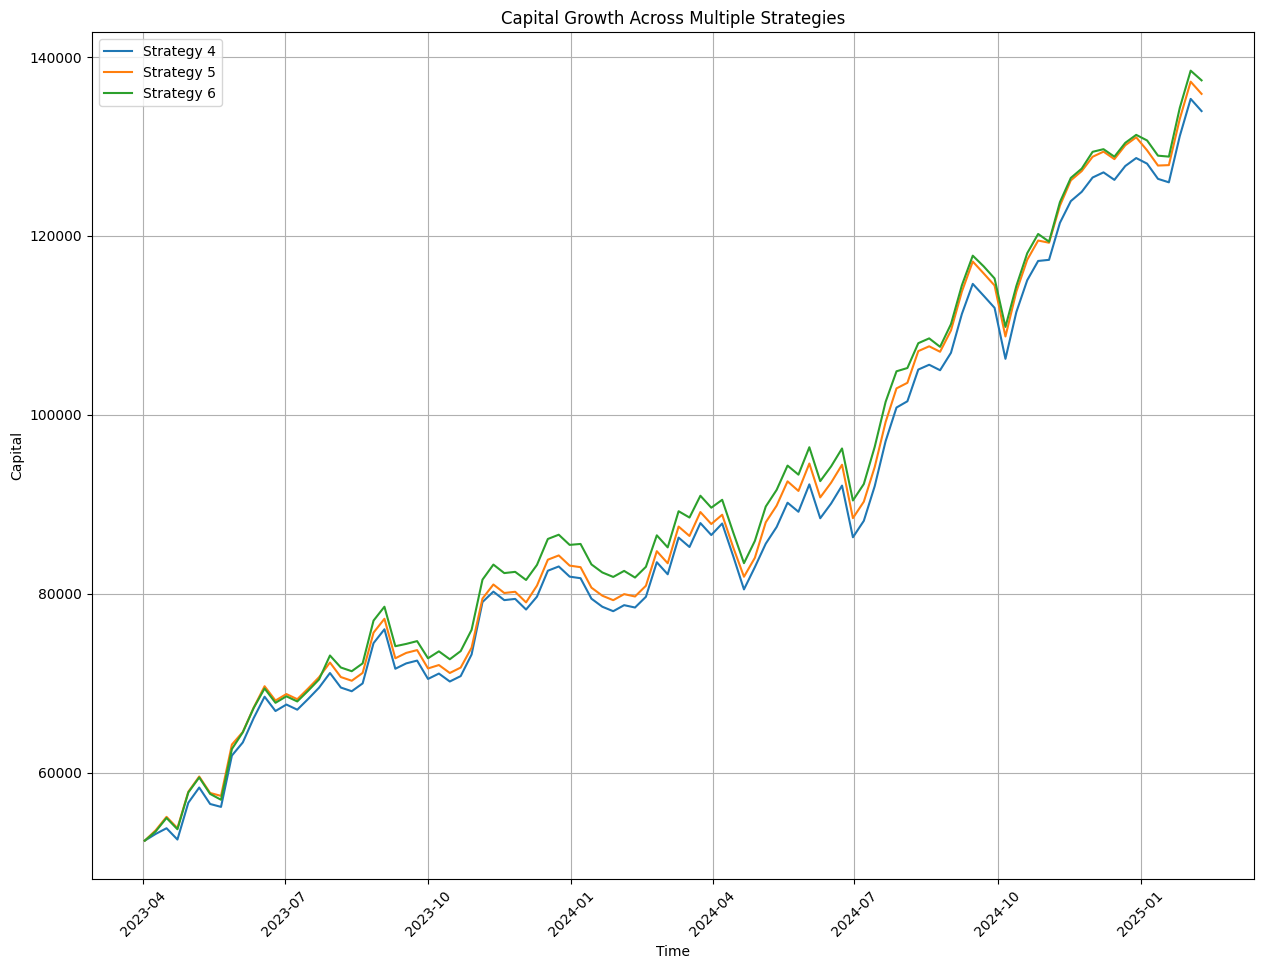

In [2]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[4,5,6],
                             plotSize=(15,11))

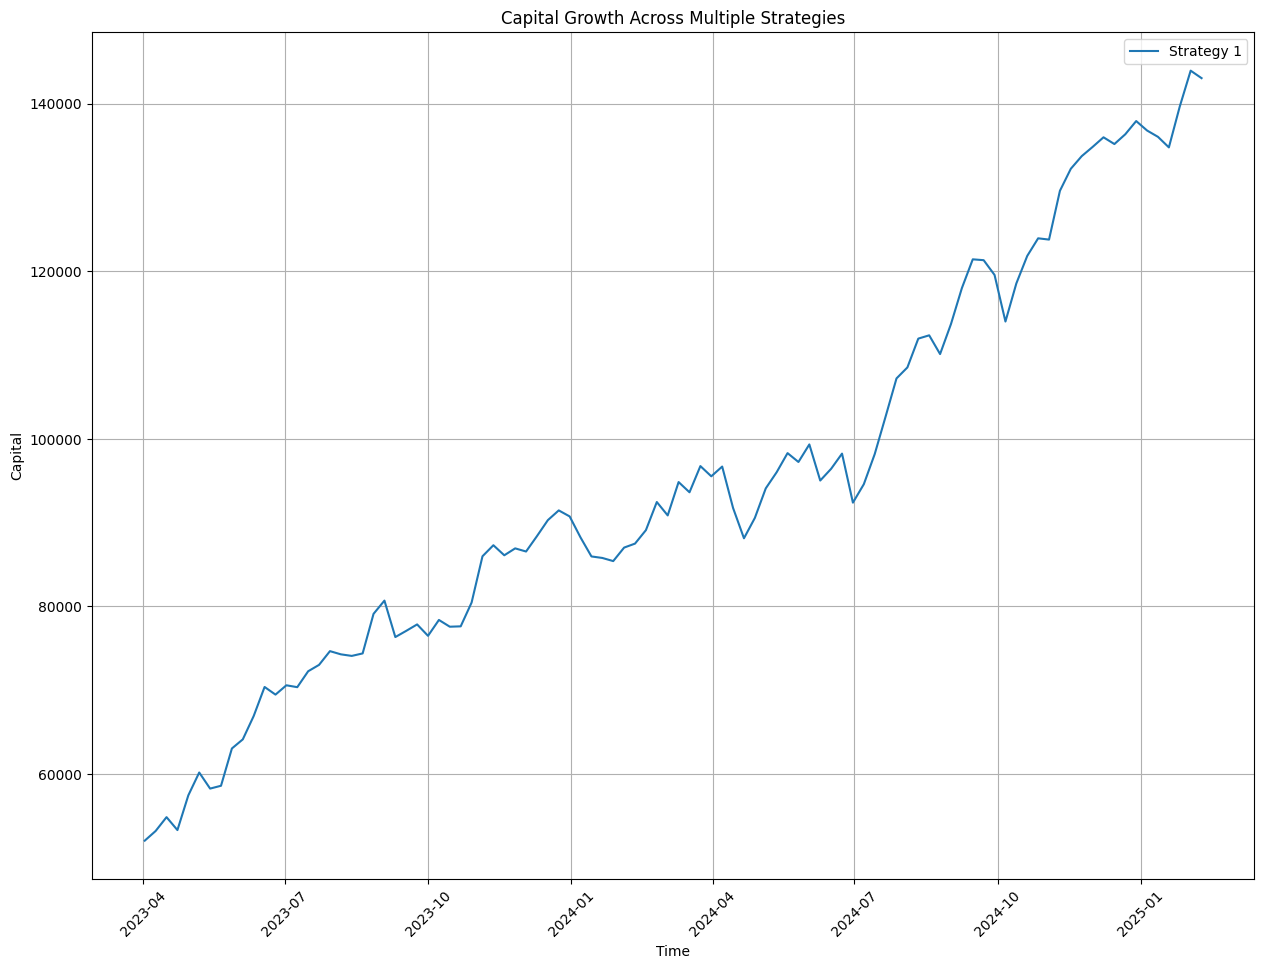

In [3]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[1],
                             plotSize=(15,11))

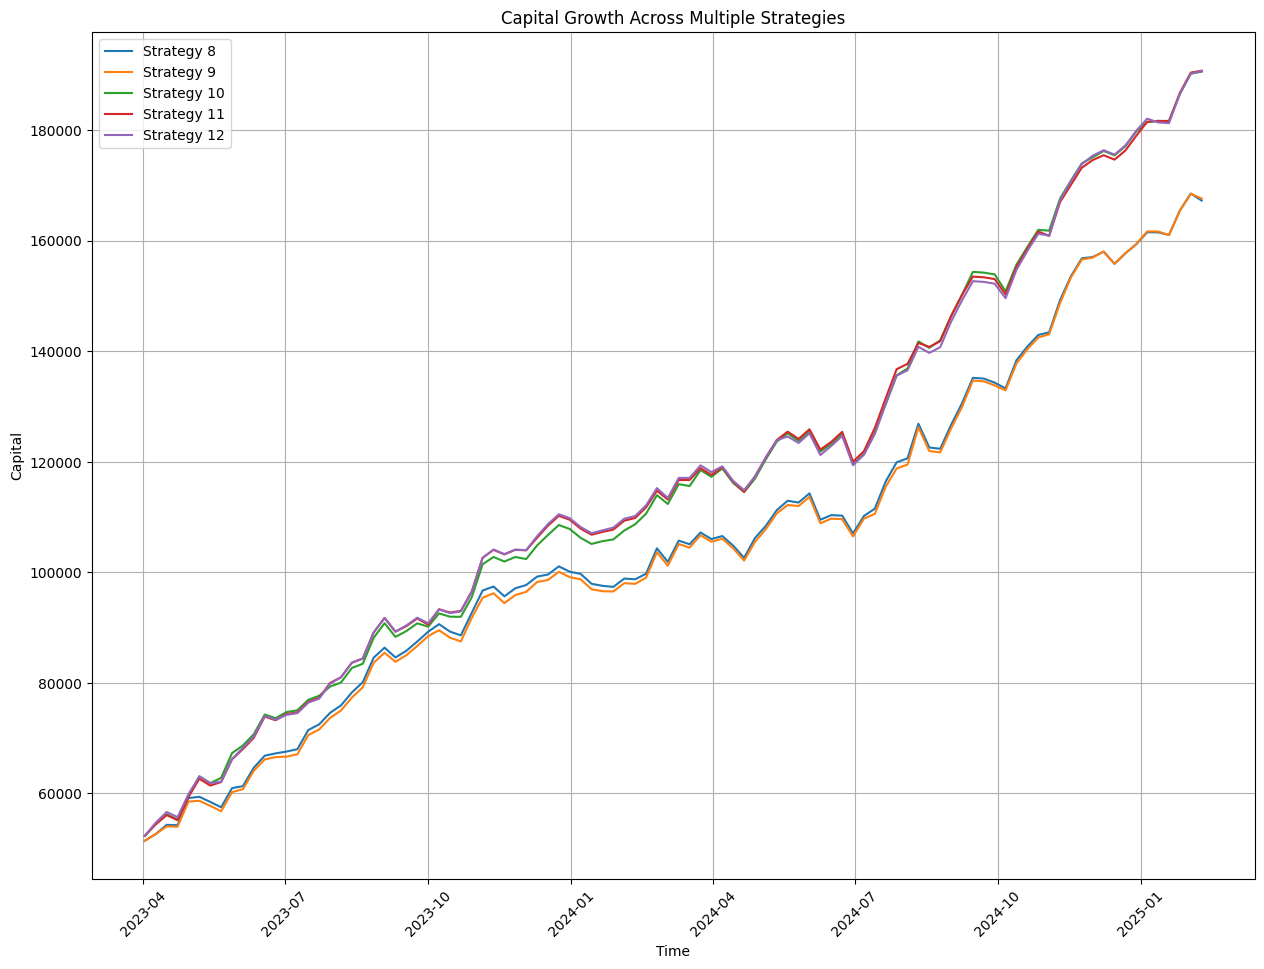

In [2]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[8,9,10,11,12],
                             plotSize=(15,11))

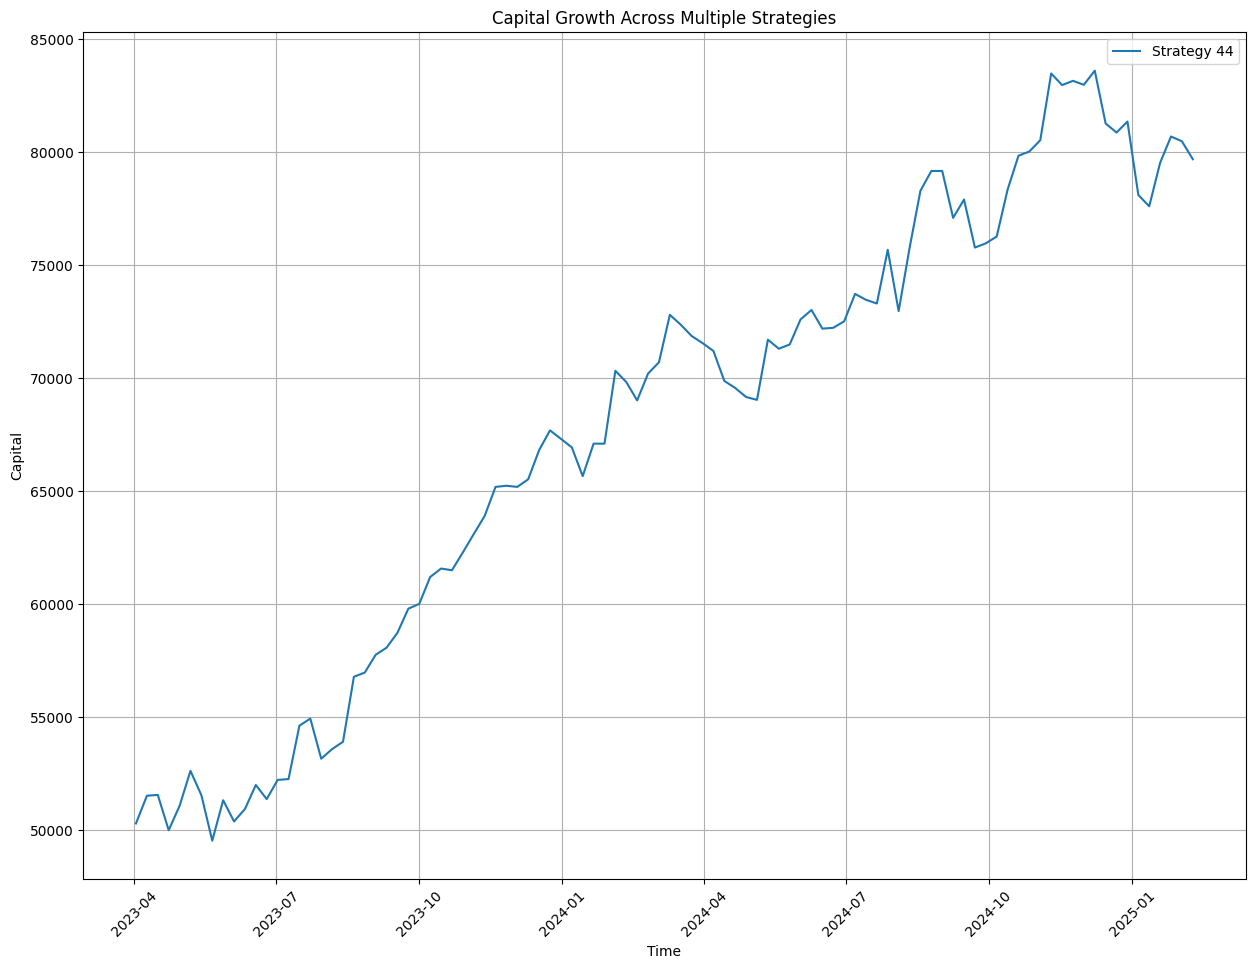

In [2]:
from processing_functions import plot_backtested_return_curve
plot_backtested_return_curve(pathOfData='trade_datas/'+filepath,
                             plotAllDatas=False, dataIdsSelected=[44],
                             plotSize=(15,11))

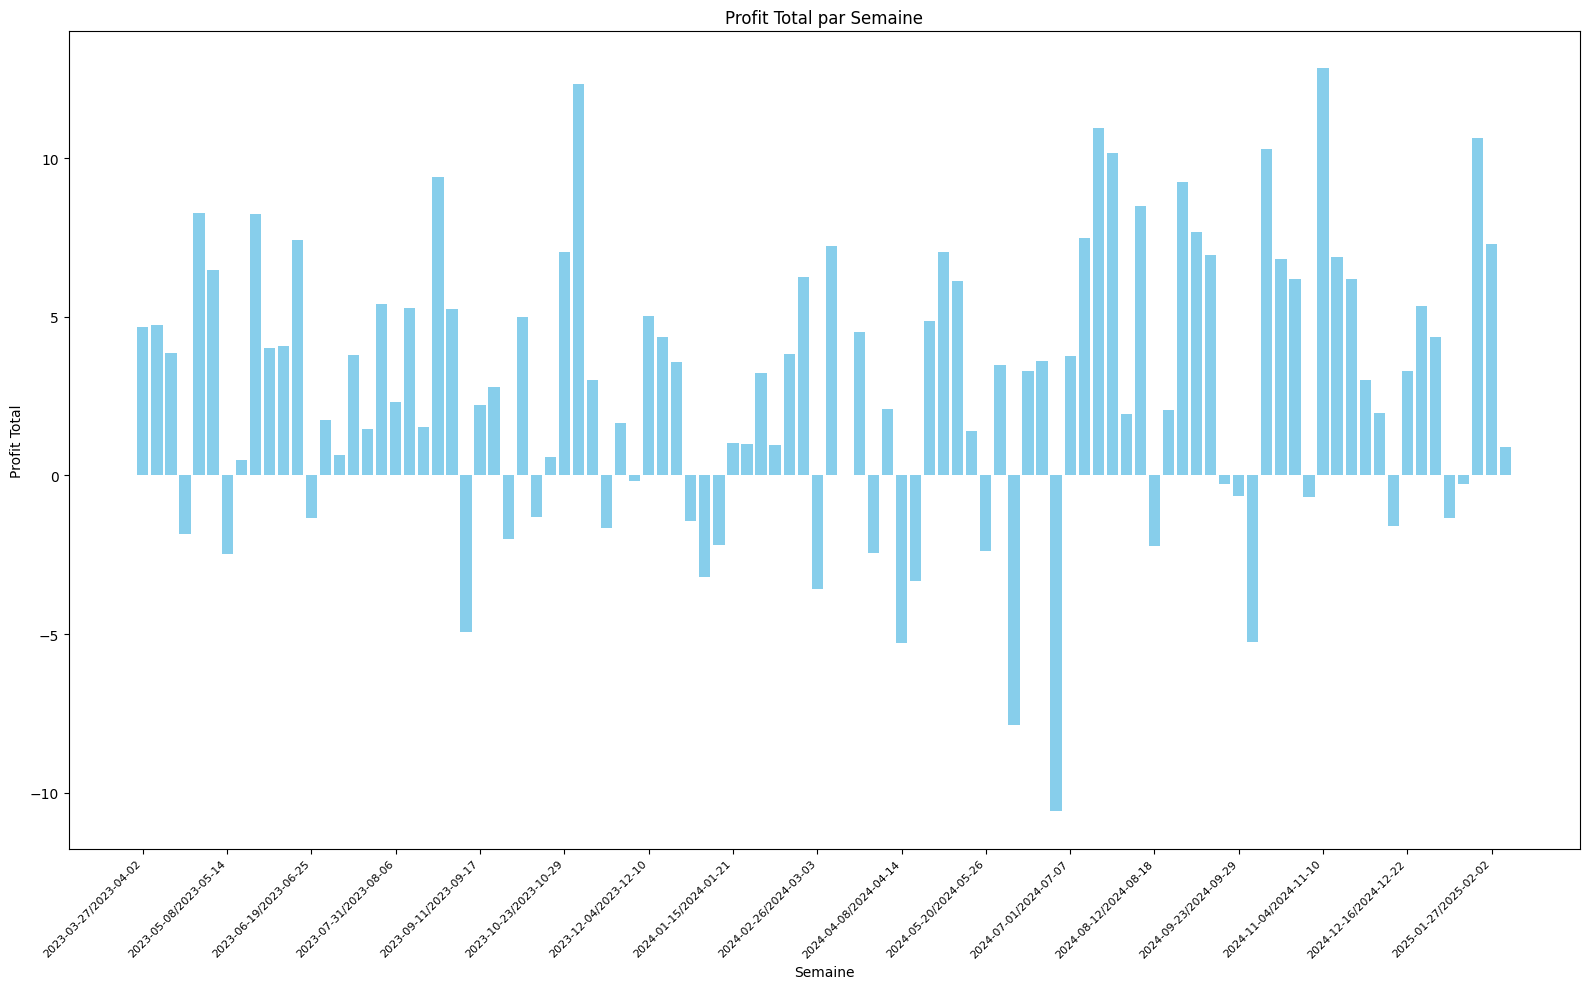

In [3]:
from processing_functions import plot_bars_of_profit_for_every_weeks
plot_bars_of_profit_for_every_weeks(filepath, 12)

Nouvelles choses à tester : 
- condition de sorties supp. si on a un grand doji/marteau/pendu (***) => fait! : résultats mauvais
- rajouter la possibilité de déplacer le TP si le profit continu. Peut etre avec la tenkan ou avec un autre indicateur? l'ATR? (***)
- stop loss suiveur avec tenkan? => méthode 4; retester avec les méthodes et sans slModifers(**) 
- restester sans niveau de pivot (**)
- rajouter une condition sur la taille de la bougie d'entrée = pas de trade si trop grande (**)
- tester d'augmenter la plage horraire de trading <7h ou >20h (**)
- analyser les heures les moins rentables = forbideenHours (**) 
- raffiner les niveaux de slModifiers/sl/tp (*)
- rajouter les niveaux du plus bas/plus haut journalier aux conditions d'entré (*)

choses à faire pour continuer à backtest :
- appliquer des conditions sur le temps de trade
    - ex : si on est en trade depuis plus de x min on stop
    - ex : si on est en zone rouge depuis plus de y min on stop


méthodes à tester maintenant :
- l'ATR défini notre niveau de TP (tester niveau de TP = atrRatio [2,3,4,5])
- la pente de l'ATR défini si on place un TP définitif, ex : si la pente de l'ATR < X et que prix actuel >= 90% TP initial on ne déplace plus le TP